<a href="https://colab.research.google.com/github/RyanPerrina/wine_classification/blob/main/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto Programmazione di Applicazioni Data Intensive
# Ryan Perrina e Manuel Luzietti

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Descrizione del problema
Il dataset in questione riguarda le varianti di vino rosso portoghese "Vinho Verde". Il dataset descrive la qualità del vino in relazione ai componenti chimici presenti. L'obiettivo del progetto è predire la qualità del vino dai 
suoi componenti ovvero predire una variabile discreta non binaria.

In [4]:
data = pd.read_csv("WineQT.csv")

# Comprensione dati

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Le features rappresentate:


*   fixed acidity | float 
*   volatile acidity | float 
*   citric acid	| float
*   residual sugar | float
*   chlorides | float
*   free sulfur dioxide	| float
*   total sulfur dioxide	| float
*   density | float
*   pH | float
*   sulphates | float
*   alcohol | float
*   quality | int
*   id | int


La variabile target è quality che assume valori da 0 a 10 con 0 qualità pessima e 10 eccellente. Id è l'identificatore dei record e verrà usato come indice del dataframe.

In [6]:
data.set_index("Id",inplace=True)

In [7]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Dal dataset possiamo notare che su alcune colonne abbiamo una variazione significativa tra media e 50 percentile, con alte std conme ad esempio "total sulfur dioxide"	oppure "free sulfur dioxide" questo significa che indica che ci sono valori particolarmente elevati agli estremi.
Si può notare anche che non sono stati rilevati vini con quality minore di 3 o maggiore di 8.

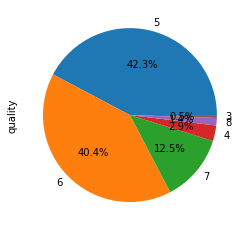

In [8]:
data["quality"].value_counts().plot.pie(autopct="%1.1f%%")

Dal grafico possiamo vedere che le classi sono sbilancite e potrebbero essere necessarie tecniche di bilanciamento. 

In [9]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Come possiamo vedere non sono presenti valori nulli su nessuna colonna. Il numero di dati presenti nel data set è:

In [10]:
data.shape

(1143, 12)

abbiamo 1143 record e 12 features.

# Data exploration


In [11]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

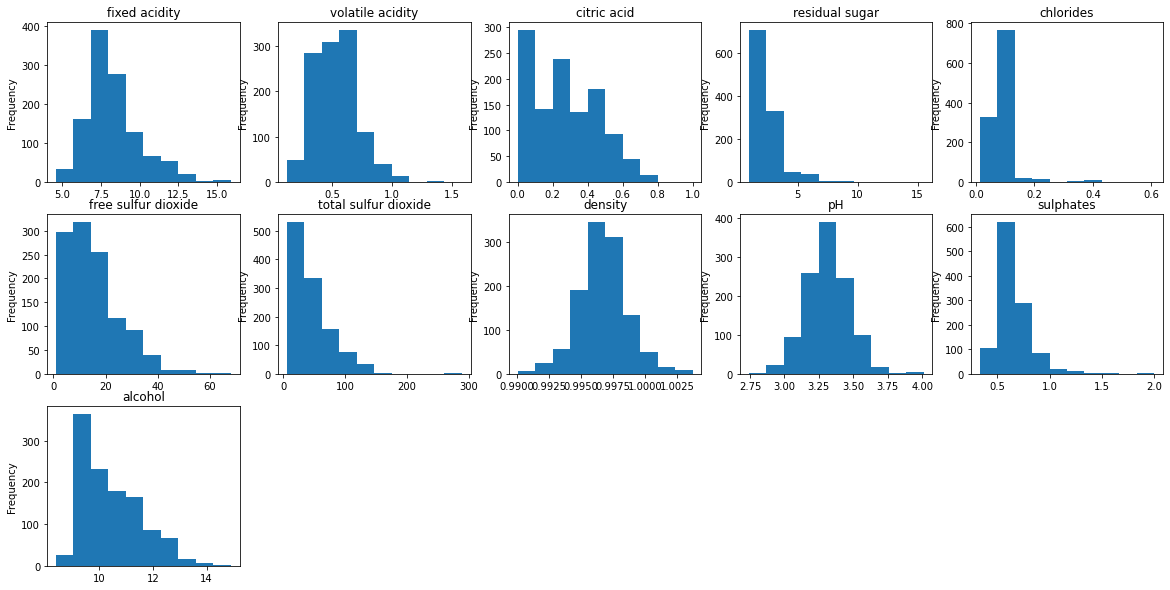

In [12]:
plt.figure(figsize=(20,10))
for i,col in enumerate(data.columns[:-1],start=1):
  data[col].plot.hist(ax=plt.subplot(3,5,i),title=col)
  

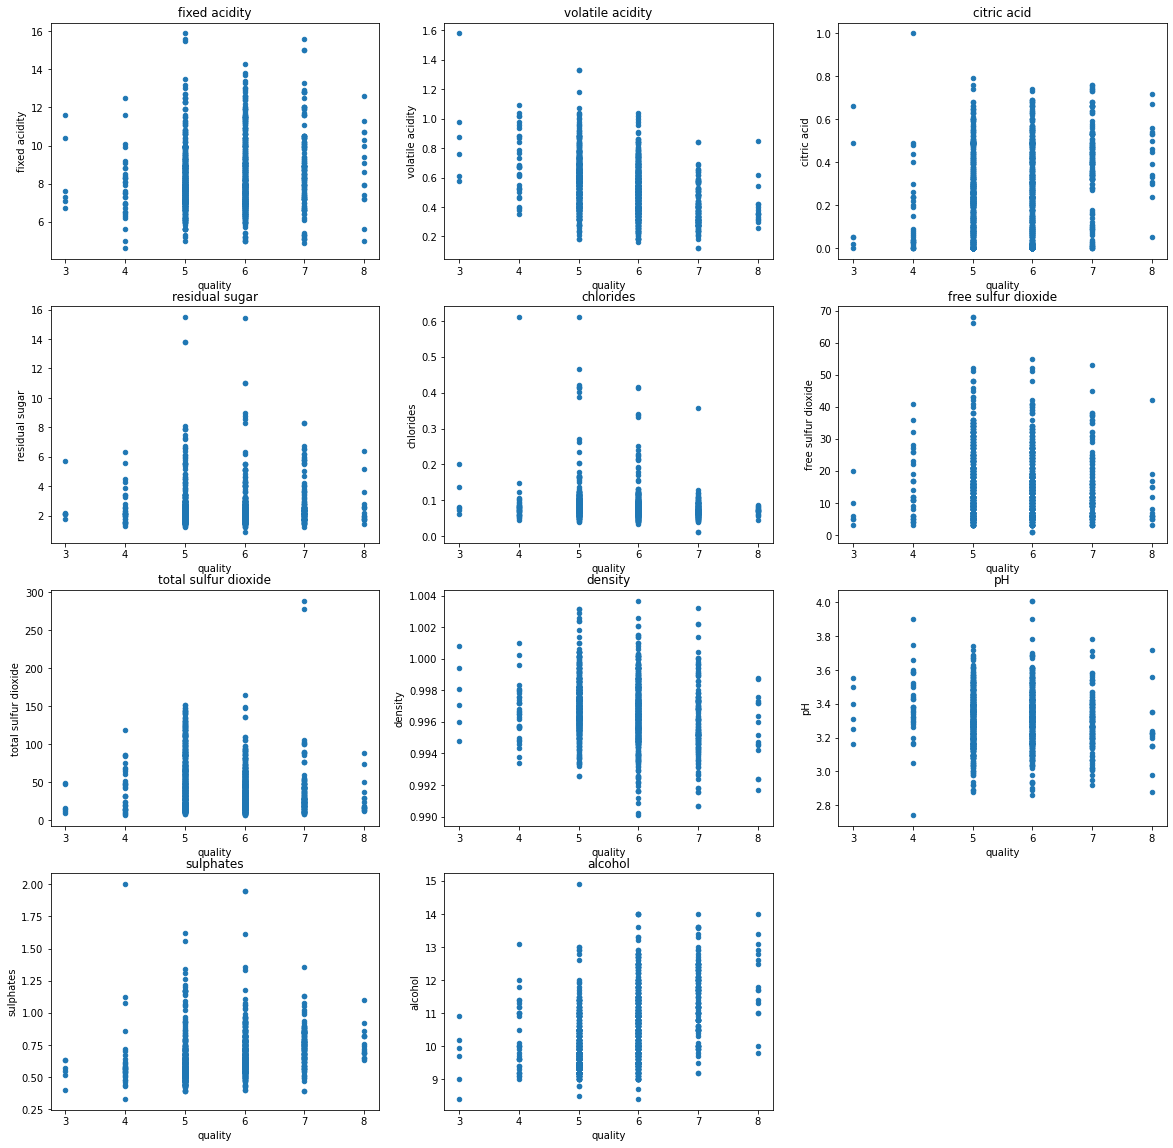

In [13]:
plt.figure(figsize=(20,20))
for i,col in enumerate(data.drop(columns="quality").columns,start=1):
  data.plot.scatter(x="quality",y=col,ax=plt.subplot(4,3,i),title=col)

Costruiamo ora la matrice degli indici di correlazione tra le varie features.

In [14]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


Dalla tabella si possono notare alcune dipenze tra la variabili di input, che verranno gestite in seguito attraverso regolarizzazione.
Possiamo notare anche con l'aggiunta di features polinomiali che in generale ad alte concentrazioni di alcohol e densità corrisponde un valore maggiore di qualità.

In [15]:
from pandas.core.frame import DataFrame
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2,include_bias=False)
d2data = p.fit_transform(data)
d2frame = DataFrame(d2data,index=data.index,columns=p.get_feature_names_out(data.columns))
d2frame.corr()["quality"].sort_values(ascending=False)[7:15]


density alcohol          0.486064
alcohol                  0.484866
alcohol^2                0.479769
citric acid quality      0.422371
sulphates alcohol        0.421844
pH alcohol               0.382603
fixed acidity alcohol    0.320437
citric acid alcohol      0.309092
Name: quality, dtype: float64

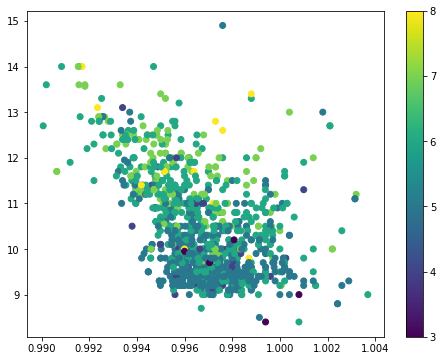

In [16]:
plt.figure(figsize=(8,6))
a=plt.scatter(data["density"],data["alcohol"],c=data["quality"])
plt.colorbar(a)


Puliamo la tabella dai valori non interessanti e ordianiamo i valori linearmente correlati con la features quality:

In [17]:
data.corr()["quality"].drop(labels="quality").abs().sort_values(ascending=False)

alcohol                 0.484866
volatile acidity        0.407394
sulphates               0.257710
citric acid             0.240821
total sulfur dioxide    0.183339
density                 0.175208
chlorides               0.124085
fixed acidity           0.121970
free sulfur dioxide     0.063260
pH                      0.052453
residual sugar          0.022002
Name: quality, dtype: float64

Possiamo notare che le prime quattro features che compaiono sono alcohol, volatile acidity, sulphates, citric acid. Questo significa che queste features sono quelle con un riscontro più rilavanti sulla qualità del vino.                     

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


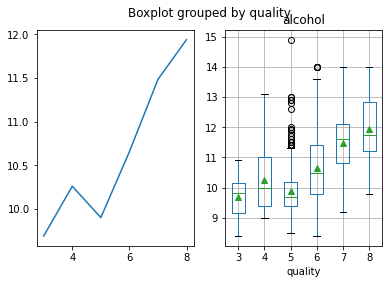

In [18]:
figure, axes = plt.subplots(1, 2)
axes[0].plot(data.groupby("quality")["alcohol"].mean().index,data.groupby("quality")["alcohol"].mean())
data.boxplot(column="alcohol", by ="quality",showmeans=True,ax=axes[1])


La correlazine tra alcohol e qualità è direttamnete proporzionale.L'indice di correllazione infatti è:


In [19]:
data.corr().loc["quality","alcohol"]

0.48486621180851264

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


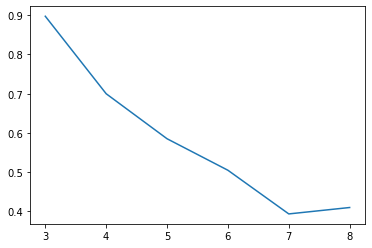

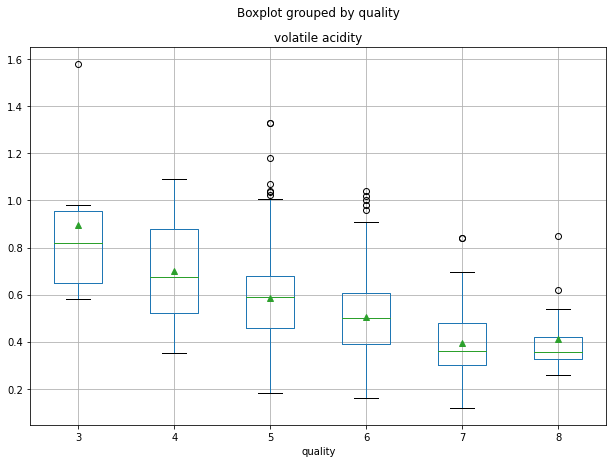

In [20]:
plt.plot(data.groupby("quality")["volatile acidity"].mean().index,data.groupby("quality")["volatile acidity"].mean())
data.boxplot(column="volatile acidity", by ="quality",showmeans=True,figsize=(10,7))

La correlazine tra volatile acidity e qualità è inversamente proporzionale.L'indice di correllazione infatti è:

In [21]:
data.corr().loc["quality","volatile acidity"]

-0.40739351292438425

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


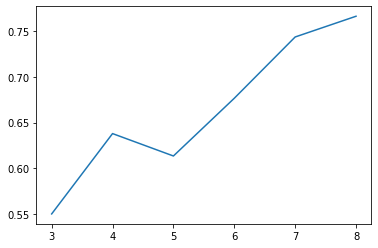

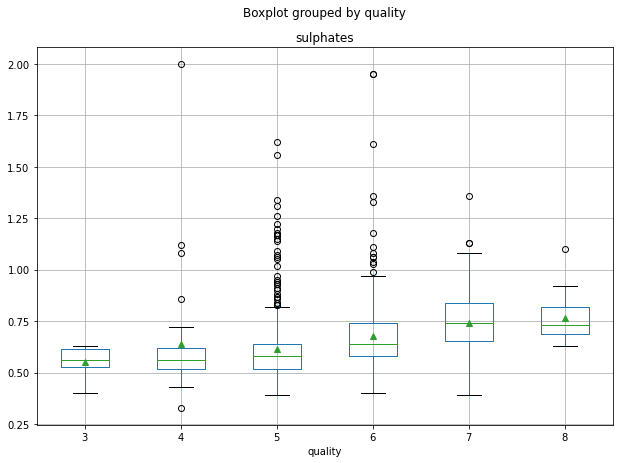

In [22]:
plt.plot(data.groupby("quality")["sulphates"].mean().index,data.groupby("quality")["sulphates"].mean())
data.boxplot(column="sulphates", by ="quality",showmeans=True,figsize=(10,7))

La correlazine tra sulphates e qualità è direttamente proporzionale.L'indice di correllazione infatti è:



In [23]:
data.corr().loc["quality","sulphates"]

0.2577102599306222

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


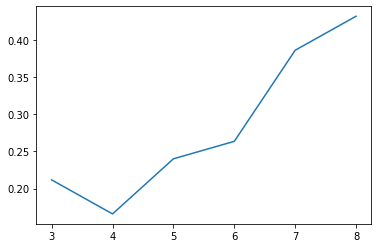

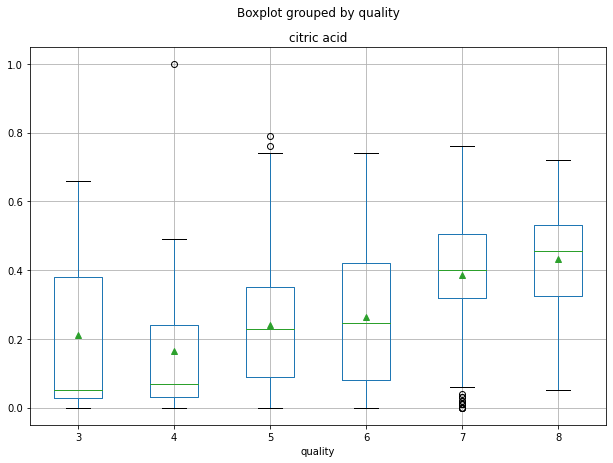

In [24]:
plt.plot(data.groupby("quality")["citric acid"].mean().index,data.groupby("quality")["citric acid"].mean())
data.boxplot(column="citric acid", by ="quality",showmeans=True,figsize=(10,7))

La correlazine tra citric acid e qualità è direttamente proporzionale.L'indice di correllazione infatti è:

In [25]:
data.corr().loc["quality","citric acid"]

0.24082083714719305

# Normalizzazione
Come possiamo vedere le features hanno scale diverse, quindi si prosegue con normalizzazione dei dati.

In [26]:
data.drop(columns="quality").aggregate(["min","max"]).T

,min,max
fixed acidity,4.60000,15.90000
volatile acidity,0.12000,1.58000
citric acid,0.00000,1.00000
residual sugar,0.90000,15.50000
chlorides,0.01200,0.61100
free sulfur dioxide,1.00000,68.00000
total sulfur dioxide,6.00000,289.00000
density,0.99007,1.00369
pH,2.74000,4.01000
sulphates,0.33000,2.00000


In [27]:
from sklearn.preprocessing import MinMaxScaler 
X = MinMaxScaler().fit_transform(data.drop(columns="quality"))
X = DataFrame(X,columns=data.drop(columns="quality").columns,index=data.index)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Id,,,,,,,,,,,
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846


In [28]:
Y = data["quality"]

# Rilevanza features

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=1/3,random_state=42)
model = Pipeline([
                  ("poly",PolynomialFeatures()),
                  ("classifier",LogisticRegression(solver="saga", random_state=42, penalty="l1", C=10,multi_class="ovr"))
])


In [49]:
from sklearn.model_selection import GridSearchCV
grid = {
        "poly__degree": [1,3,5],
    "classifier__C": [0.01,0.1,1,10],
    "classifier__class_weight" : ["balanced",None]
}
gs = GridSearchCV(model,cv=StratifiedKFold(3,shuffle=True, random_state=42),param_grid=grid,return_train_score=True)
gs.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('classifier',
                                        LogisticRegression(C=10,
                                                           multi_class='ovr',
                                                           penalty='l1',
                                                           random_state=42,
                                                           solver='saga'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__class_weight': ['balanced', None],
                         'poly__degree': [1, 3, 5]},
             return_train_score=True)

In [50]:
DataFrame(gs.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__class_weight,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
23,21.891616,0.283231,0.013197,0.000118,10,None,5,"{'classifier__C': 10, 'classifier__class_weigh...",0.555118,0.618110,0.590551,0.587927,0.025783,1,0.647638,0.594488,0.620079,0.620735,0.021703
22,1.945707,0.029166,0.007277,0.000695,10,None,3,"{'classifier__C': 10, 'classifier__class_weigh...",0.539370,0.618110,0.602362,0.586614,0.034020,2,0.649606,0.612205,0.629921,0.630577,0.015276
21,0.109881,0.021851,0.002210,0.000117,10,None,1,"{'classifier__C': 10, 'classifier__class_weigh...",0.519685,0.625984,0.602362,0.582677,0.045574,3,0.616142,0.590551,0.616142,0.607612,0.012064
17,21.361391,0.620490,0.011257,0.000791,1,None,5,"{'classifier__C': 1, 'classifier__class_weight...",0.539370,0.594488,0.578740,0.570866,0.023180,4,0.598425,0.570866,0.574803,0.581365,0.012170
16,1.785563,0.088794,0.005560,0.001077,1,None,3,"{'classifier__C': 1, 'classifier__class_weight...",0.535433,0.586614,0.582677,0.568241,0.023255,5,0.608268,0.574803,0.576772,0.586614,0.015332
15,0.072320,0.011921,0.003034,0.000324,1,None,1,"{'classifier__C': 1, 'classifier__class_weight...",0.531496,0.586614,0.582677,0.566929,0.025106,6,0.608268,0.576772,0.568898,0.584646,0.017010
10,0.353544,0.146564,0.003723,0.000236,0.1,None,3,"{'classifier__C': 0.1, 'classifier__class_weig...",0.531496,0.539370,0.562992,0.544619,0.013383,7,0.564961,0.541339,0.529528,0.545276,0.014731
11,5.730346,1.552804,0.012289,0.001016,0.1,None,5,"{'classifier__C': 0.1, 'classifier__class_weig...",0.531496,0.539370,0.562992,0.544619,0.013383,7,0.564961,0.541339,0.529528,0.545276,0.014731
9,0.022277,0.003039,0.002941,0.000297,0.1,None,1,"{'classifier__C': 0.1, 'classifier__class_weig...",0.531496,0.535433,0.562992,0.543307,0.014012,9,0.564961,0.521654,0.529528,0.538714,0.018836
20,23.756393,0.295057,0.012551,0.002289,10,balanced,5,"{'classifier__C': 10, 'classifier__class_weigh...",0.444882,0.460630,0.566929,0.490814,0.054204,10,0.570866,0.537402,0.586614,0.564961,0.020520


In [51]:
gs.score(X_val,y_val)

0.5905511811023622

In [52]:
DataFrame(gs.best_estimator_.named_steps["classifier"].coef_,columns=gs.best_estimator_.named_steps["poly"].get_feature_names_out()).mean().sort_values()

1                          -1.090947
free sulfur dioxide        -0.424470
density                    -0.403193
total sulfur dioxide       -0.373114
pH                         -0.313023
                              ...   
chlorides alcohol           0.087150
fixed acidity^3             0.088855
citric acid density^2       0.096360
density alcohol             0.112052
volatile acidity alcohol    0.203543
Length: 4368, dtype: float64

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = gs.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
DataFrame(cm,index=gs.classes_,columns=gs.classes_)

,3,4,5,6,7,8
3,0,1,0,0,0,0
4,0,0,6,4,0,0
5,0,1,121,35,2,0
6,0,1,57,96,5,0
7,0,0,6,33,8,0
8,0,0,0,5,0,0


In [58]:
from sklearn.metrics import f1_score
f1_score(y_val,y_pred,average="weighted")

0.5625537755488579